In [1]:
#https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage',
    batch_size=32,#one batch is 32 images
    image_size=(256, 256),
    shuffle=True,#randomly select images
)
#used to load images from a directory structure into a TensorFlow tf.data.Dataset object, where each element is a tensor representing a batch of images and their corresponding labels.

Found 2152 files belonging to 3 classes.


In [4]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
#we have 68 batches containing 32 images each

68

(32, 256, 256, 3)
(32,)


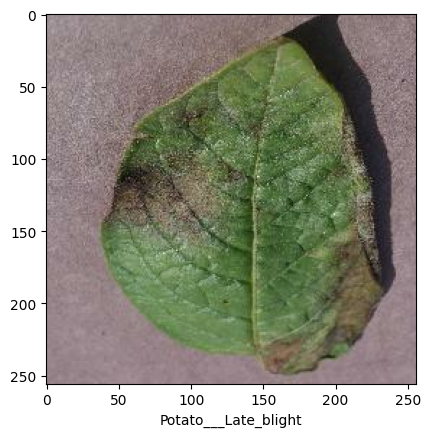

In [6]:
for image_batch , label_batch in dataset.take(1): #create a new dataset object from the first batch
    print(image_batch.shape)
    print(label_batch.shape)
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.xlabel(f'{dataset.class_names[label_batch[0]]}')

In [7]:
# 80% for training and 20% for test 
train_dataset=dataset.take(54)
test_dataset=dataset.skip(54)
print(len(train_dataset) , len(test_dataset))

54 14


In [8]:
# 10% for cv set and 10% for test dataset
test_dataset_new=test_dataset.take(7)
cv_dataset=test_dataset.skip(7)
print(len(test_dataset_new),len(cv_dataset))

7 7


In [9]:
from keras import Sequential
from keras.layers import Resizing, Rescaling, RandomRotation, RandomFlip

#preprocessing Pipeline

resize_and_rescale=Sequential([
    Rescaling(1.0/255) #normalizing the dataset
])

In [10]:

from keras import layers
model = Sequential([
    resize_and_rescale,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(3, activation='softmax'),
])

C:\Users\singer\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
history=model.fit(train_dataset,epochs=20,batch_size=32,validation_data=cv_dataset)
#here we already know the batch size is 32

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 519ms/step - accuracy: 0.4968 - loss: 0.9442 - val_accuracy: 0.4550 - val_loss: 0.8956
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - accuracy: 0.6293 - loss: 0.8009 - val_accuracy: 0.7700 - val_loss: 0.5572
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 484ms/step - accuracy: 0.7792 - loss: 0.5345 - val_accuracy: 0.8100 - val_loss: 0.4432
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 495ms/step - accuracy: 0.8497 - loss: 0.3683 - val_accuracy: 0.8500 - val_loss: 0.3152
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 516ms/step - accuracy: 0.8930 - loss: 0.2729 - val_accuracy: 0.8800 - val_loss: 0.2375
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 521ms/step - accuracy: 0.8965 - loss: 0.2395 - val_accuracy: 0.9250 - val_loss: 0.1914
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 545ms/step - accuracy: 0.9161 - loss: 0.2038 - val_accuracy: 0.9250 - val_loss: 0.2150
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 570ms/step - accuracy: 0.8969 - loss: 0.2335 - val_accu

In [13]:
scores=model.evaluate(test_dataset)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9755 - loss: 0.0776


In [14]:
history


In [15]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 54}

In [16]:
history.history.keys()
#these are the parameters we calculated in the each iteration

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
history.history['accuracy']

[0.5434027910232544,
 0.6846064925193787,
 0.7986111044883728,
 0.8553240895271301,
 0.8969907164573669,
 0.9074074029922485,
 0.9207175970077515,
 0.9045138955116272,
 0.9311342835426331,
 0.9328703880310059,
 0.9571759104728699,
 0.9646990895271301,
 0.9675925970077515,
 0.9756944179534912,
 0.9762731194496155,
 0.9895833134651184,
 0.9878472089767456,
 0.984375,
 0.9820601940155029,
 0.9658564925193787]

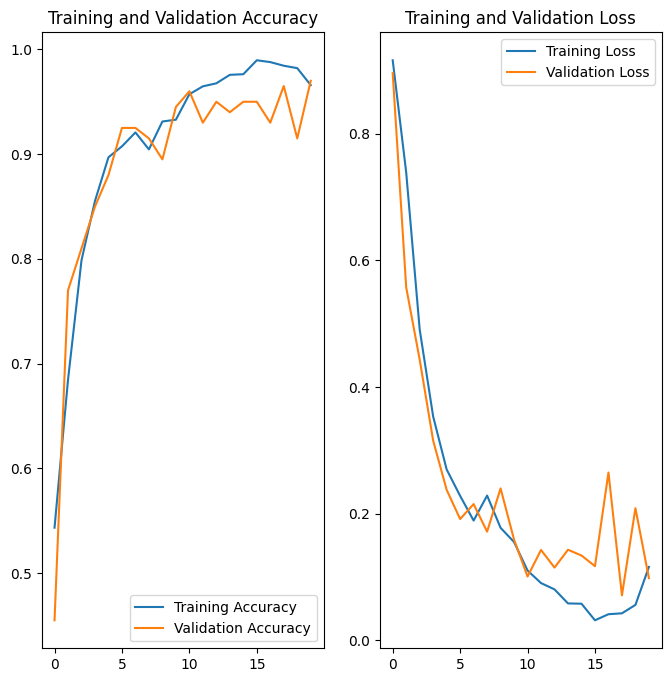

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(20), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), history.history['loss'], label='Training Loss')
plt.plot(range(20), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
predicted label: Potato___Late_blight


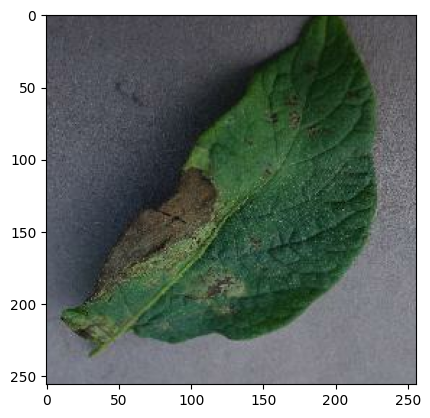

In [19]:
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",dataset.class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",dataset.class_names[np.argmax(batch_prediction[0])])

In [20]:
def predict(model, img_array):
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predicted_class = dataset.class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


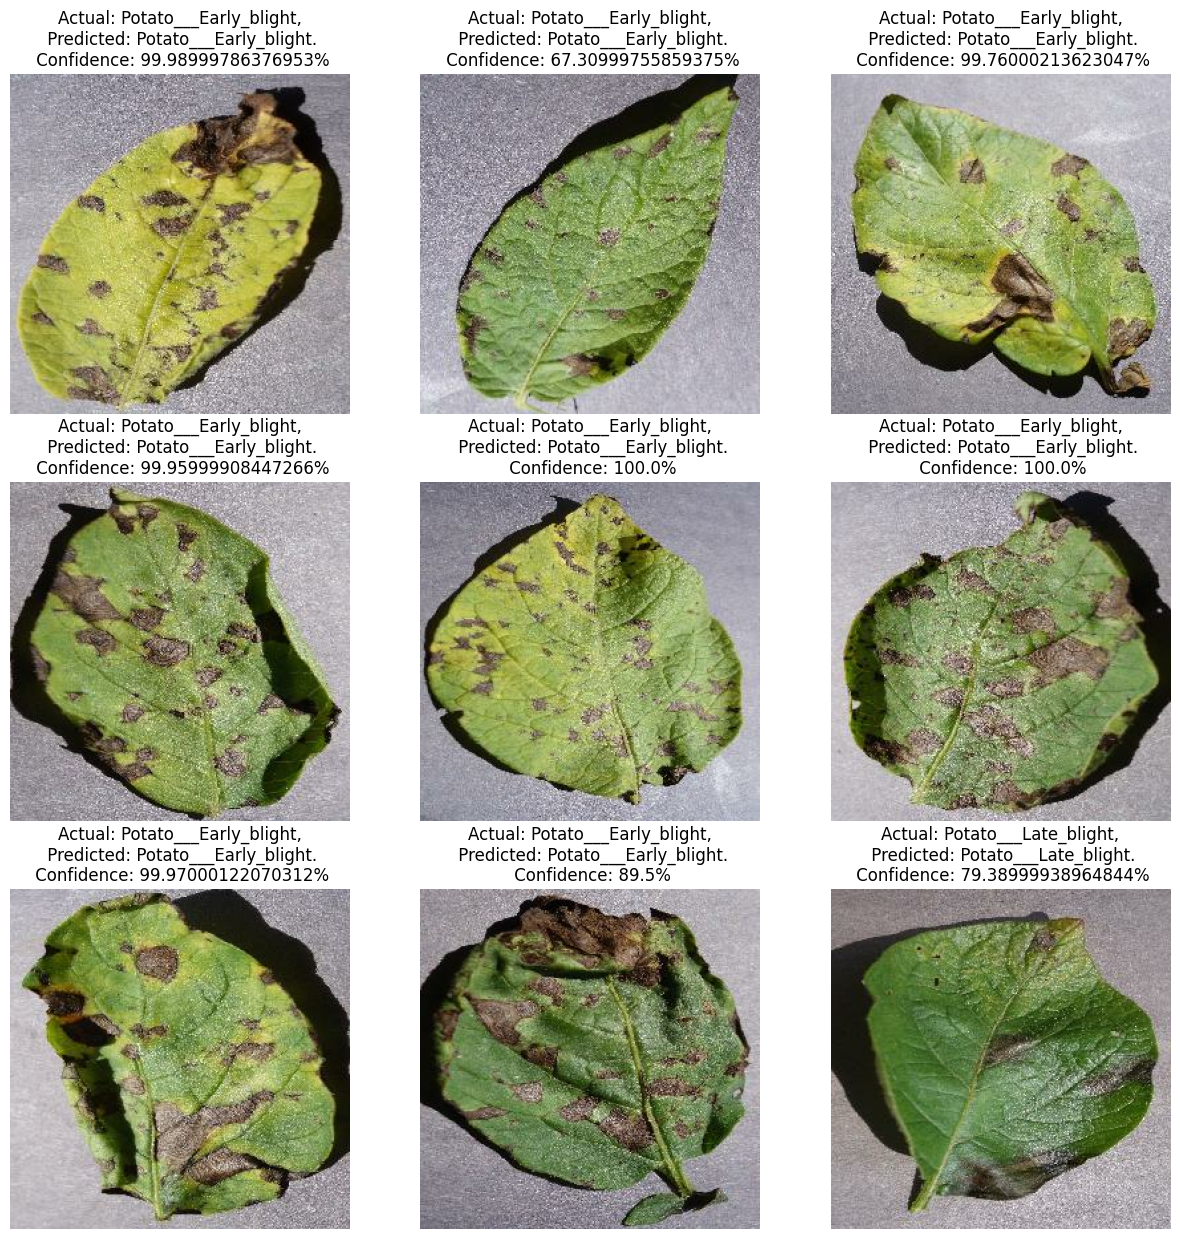

In [21]:

plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = dataset.class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [22]:
model_version = 2
model.save("new2.h5")         